# Examen IS M8 du 31/03 
------
Le but de cet examen est de tester si vous avez acquis les compétences enseignées sur la première partie de M8.

**Consignes**
  - Le fichier ipynb rempli devra être soumis sur le [dépot moodle](https://moodle.insa-rouen.fr/mod/assign/view.php?id=59084)
  - Vous avez accès aux sites suivants pour la documentation, en plus de la fonction help(), :
      *  https://matplotlib.org/stable/
      * https://numpy.org/doc/
      * https://docs.scipy.org/doc/scipy/reference/
      * https://scikit-learn.org/stable/
  - Le barême est indicatif et pourra être amené à changer
  - L'efficacité et la simplicité de votre code sera pris en compte
  - Afin de garantir l'équité pour tout les groupes, pas de questions. Si vous avez un doute faites au mieux. Si il y a une erreur de ma part, ce sera pris en compte.
  - En fin d'examen, déconnectez vous mais **n'éteignez pas** les postes.
______________

##  Exercice 1 : du Python [5 points]
Analysez le code suivant et trouver les 8 erreurs qui s'y sont glissées pour calculer correctement une analyse de variance et un coefficient de corrélation. 
Le jeu de données `X` correspond aux performances de 41 athletes pour les 10 épreuves( variable `epreuves`) durant deux competitions : JO et Decastar (variable `competition`).


['JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO'
 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO' 'JO'
 'Decastar' 'Decastar' 'Decastar' 'Decastar' 'Decastar' 'Decastar'
 'Decastar' 'Decastar' 'Decastar' 'Decastar' 'Decastar' 'Decastar'
 'Decastar']
['100m' 'Longueur' 'Poids' 'Hauteur' '400m' '110m H' 'Disque' 'Perche'
 'Javelot' '1500m' 'Points']
la variance totale est de : 4689103.512195122
La variance de la competition JO est de 3747890.964285714
La variance de la competition Decastar est de 752970.923076923
La variance interclasse est de 188241.62483248505
Le rapport de corrélation est de 0.04, donc le type de compétition n'influe pas sur la différence de niveau entre athlètes
-0.5986776720329979


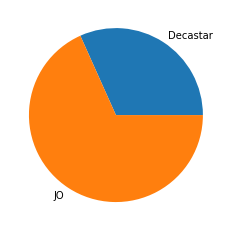

In [1]:
# on charge les bibliothèques
import numpy as np
import matplotlib.pyplot as plt #erreur 1, a virer

################
# DEBUT ZONE SANS ERREUR
######################
#on charge les données

data = np.load('data_decath.npz')
X=data['X'] # X contient toutes les perrfomances pour chaque athlète pour chaque épreuve
competition = data['type_competition'] # Les competitions associées à chaque performance au decathlon (JO et Decastar)
print(competition)
epreuves = data['epreuves'] #La liste des épreuves
print(epreuves)
col_points = np.where(epreuves=="Points") #Le total des points pour les 10 épreuves pour chaque athlète
x_points = X[:,col_points]
################
# FIN ZONE SANS ERREUR
######################

labels,effectifs = np.unique(competition,return_counts=True) # erreur 5 : oubliez le return_counts
plt.pie(effectifs,labels=labels);

#Analyse de la variance totale avec numpy (voir Annexe) 
var_total = np.sum((x_points - np.mean(x_points))**2)
print(f"la variance totale est de : {var_total}")
#decoupage des données en jo et decastar
x_jo = []
x_decastar = []
n=x_points.shape[0]

for i in range(n): #deuxieme erreur, mettre (1,n)
    if(competition[i] == 'JO'):
        x_jo.append(x_points[i])
    else:
        x_decastar.append(x_points[i])
x_jo=np.array(x_jo)
n_jo=x_jo.shape[0]

x_decastar=np.array(x_decastar)
n_decastar=x_decastar.shape[0]

#variance intra classe jo et decastar
var_jo = np.sum((x_jo - np.mean(x_jo))**2) # erreur 3 : mettre x_points pour la moyenne
var_decastar = np.sum((x_decastar - np.mean(x_decastar))**2) #erreur 8 : mettre le **2 en dehors de la parenthèse
print(f"La variance de la competition JO est de {var_jo}")
print(f"La variance de la competition Decastar est de {var_decastar}")


#variance interclasse
var_inter_classe = n_jo*(np.mean(x_jo) - np.mean(x_points))**2
var_inter_classe += n_decastar*(np.mean(x_decastar) - np.mean(x_points))**2 #erreur 4 : oublier le +

print(f"La variance interclasse est de {var_inter_classe}")

#calcul rapport de corrélation
rapport_corr = (var_inter_classe)/var_total
print(f"Le rapport de corrélation est de {rapport_corr:.2f}, donc le type de compétition n'influe pas sur la différence de niveau entre athlètes")

#calcul de la corrélation entre 100m et Longueur
c1 = np.where(epreuves=="100m")
c2 = np.where(epreuves=="Longueur")
corr =  np.mean((X[:,c1] - np.mean(X[:,c1]))*(X[:,c2] - np.mean(X[:,c2]))) /(np.prod(np.std(X[:,[c1,c2]],axis=0)))
# avec erreur 6 et 7 : 
#corr =  np.mean((X[:,c1] - np.mean(X[:,c1]))*(X[:,c2] - np.mean(X))) /(np.prod(np.std(X[:,[c1,c2]])))
print(corr)

#Comment interprétez vous ce coefficient de corrélation ?

Question bonus : Comment interprétez vous le coefficient de corrélation ?

## Exercice 2 : ACP géographique [10 points]

Le but de cet exercice est de faire une ACP d'un ensemble de données représentant la température mensuelle ($p = 12$) de $n=15$ villes françaises. Le code suivant permet de charger les données dans la matrice `X`, les latitudes et longitudes de chaque ville dans `latitude` et `longitude`, et enfin le nom des villes dans `villes`. L'ordre donné est consistant, c'est à dire que `X[i,:]` contient toutes les températures observées pour la ville `villes[i]` de coordonnées `latitude[i],longitude[i]`. Les mois sont renseignés dans la variable `mois`. Pour information, la latitude indique un positionnement sur l'axe Nord/Sud, et la longitude sur l'axe Est/Ouest.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('data_temp.npz')
X = data['X'] #les données de températures
latitude = data['latitude'] # les latitudes de chaque ville
longitude = data['longitude'] # les longitudes de chaque ville
villes = data['villes'] # le nom des villes
mois = data['mois'] # les mois de chaque colonne


### Visualisation des données
   1. Affichez une représentation des températures moyennes de l'ensemble des villes pour chaque mois sous forme de boxplots. Le graphique vous parait-il cohérent ? Observez vous des données aberrantes ?  

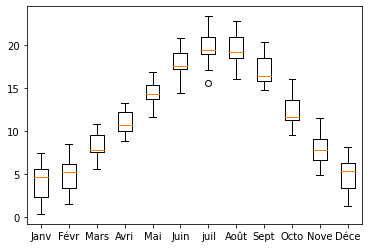

In [3]:
plt.boxplot(X);
plt.xticks(range(1,13), mois);
# cohérent une donnée aberrante pour juillet et Brest.

### Calcul de l'ACP
   1. Normalisez les données de températures dans une variable `X_norm`

In [4]:
X_norm = (X - np.mean(X, axis=0))/np.std(X,axis=0)
n,p = X_norm.shape

   2. Calculez la matrice de variance/covariance de `X_norm`

In [5]:
cov = 1/n *  (X_norm.T @ X_norm)

   3. Affichez la matrice de covariance. La matrice de covariance vous parait elle cohérente.

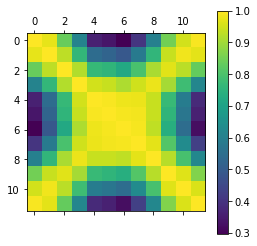

In [6]:
plt.matshow(cov)
plt.colorbar();

Oui, cohérente car $\in {-1,1}$, symétrique, diag à 1

   4. Calculez les deux premiers axes de l'ACP. 
   
        a) Vérifiez que les deux vecteurs propres sont bien orthogonaux et de norme égale à 1.
        
        b) En déduire la matrice de projection `P` permettant de passer de l'espace de départ vers un espace à deux dimensions.
    

In [7]:
w,v = np.linalg.eigh(cov)
w = w[::-1]
v=v[:,::-1]
P=v[:,:2]
print(P[:,0].T@P[:,1]) #a)
print(np.linalg.norm(P[:,0]), np.linalg.norm(P[:,1]))

1.1102230246251565e-16
0.9999999999999994 0.9999999999999996


   5. Quel est le pourcentage de variance (information) expliqué par ces deux premiers axes ?
    

In [8]:
print(f"Pourcentage de variance :  {(np.sum(w[:2])/np.sum(w)) * 100}")

Pourcentage de variance :  98.81831649664497


    6. Affichez un graphique sous forme de barres montrant le ratio de variance expliquée cumulée pour chaque axe.

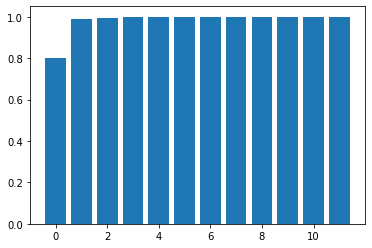

In [9]:
plt.bar(x=range(p), height=np.cumsum(w)/np.sum(w));

### Représentation en 2D
   1. Calculez la projection en 2D des données `X_norm` via la matrice de projection `P` calculée plus haut.
    

In [10]:
X_proj = X_norm@P

   2. Affichez un graphique avec les nouvelles coordonées de chaque ville. 
   
   Affichez également le nom de chaque ville pour chaque point via la function `plt.text(x,y,"text")` (voir annexe). Commentez ce que vous observez.

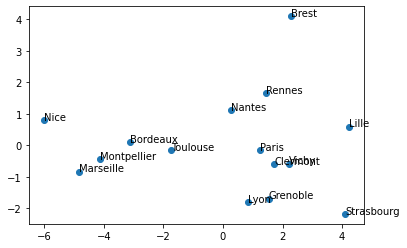

In [11]:
plt.scatter(X_proj[:,0],X_proj[:,1])
for i in range(n):
    plt.text(X_proj[i,0],X_proj[i,1], villes[i])
    

La position géographique des villes ressort des deux premiers axes de l'ACP

### Analyse corrélation 1er axe/Latitude
   1. Calculez le coefficient de corrélation entre le 1er axe des données projetées et les variables `latitude` et `longitude`

In [14]:
def corr(x,y):
    mu_x = np.mean(x)
    mu_y = np.mean(y)
    a = np.sum(x.T @ y - n*mu_x*mu_y)
    b = np.linalg.norm(x-mu_x) * np.linalg.norm(y - mu_y)
    return a/b

print(corr(X_proj[:,0],latitude))
print(np.corrcoef(X_proj[:,0],latitude))
print(corr(X_proj[:,0],longitude))
      

0.8389348225053145
[[1.         0.83893482]
 [0.83893482 1.        ]]
-0.17148391835024834


   2. Commentez les deux coefficients calculés. Cela vous parait il cohérent comme observation ?
    

Oui, la latitude N/S influe sur la température.

## Exercice 3 : L'harmonie moyenne [5 points]
Dans cet exercice, on vous propose de calculer une nouvelle moyenne appelée moyenne harmonique. La moyenne harmonique $c$ d'un ensemble de points $x_i, i \in 1, \dots, n$ est définie comme la valeur $c$ minimisant $J(c)$:

$$
J(c) = \sum_{i = 1}^n \left( \frac{1}{x_i} - \frac{1}{c} \right) ^2
$$

$$
c^\star = \underset{c \in \mathbb{R}}{\textrm{ arg min}} J(c)
$$


1.Quelle méthode utilisez vous pour trouver $c$ ?

2.Démontrer sur la copie que $c = \frac{1}{\frac{1}{n} \sum_{i=1}^n \frac{1}{x_i} } $ .

$$
J(c) = \frac{n}{c^2} + \sum_{i = 1}^n \frac{1}{x_i^2} - \frac{2}{x_i c}
$$

$$
\nabla_c J(c) = \frac{2n}{c^3} - \sum_{i = 1}^n \frac{2}{x_i c^2}
$$

$$
\begin{align}
& \nabla_c J(c)  =   0 \\
\Leftrightarrow & \frac{n}{c^3} =  \sum_{i = 1}^n \frac{1}{x_i c^2} \\
 \Leftrightarrow & \frac{n}{c} =  \sum_{i = 1}^n \frac{1}{x_i}\\
 \Leftrightarrow & \frac{1}{c} =  \frac{1}{n} \sum_{i = 1}^n \frac{1}{x_i} \\
 \Leftrightarrow & {c} = \frac{1}{ \frac{1}{n} \sum_{i = 1}^n \frac{1}{x_i}}\\ 
\end{align}
$$

2. Application numérique. Soit le trajet en voiture suivant : 
    |Distance (km) | 0-20 | 20-40 | 40-60 | 60-80 | 80-100 |
    |--- | --- | ---|--- | --- | --- |
    |Vitesse (km/h) | 40 | 80 | 100 | 40 | 80 |
    
    
  a. Calculez la moyenne et la médiane des vitesses
    
  b. Calculez le temps de parcours et en déduire la vitesse moyenne
    
  c. Calculez la moyenne harmonique. Comparez avec la vitesse moyenne et la moyenne des vitesses. Commentez.

In [14]:
x = np.array([40,80,100,40,80])

In [15]:
#a 
print(f"Moyenne des vitesses : {np.mean(x)}")
print(f"Médiane des vitesses : {np.median(x)}")
#b
temps_total = np.sum(20/x)
print(f"vitesse moyenne : {100/temps_total}")



def moy_h(x):
    n = len(x)
    return 1/((1/n) * np.sum(1/x))

#c
print(moy_h(x))
# la moyenne harmonique est plus représentative que les autres mesures car on parcourt plus ou moins de temps à chacune des vitesses

Moyenne des vitesses : 68.0
Médiane des vitesses : 80.0
vitesse moyenne : 58.82352941176471
58.8235294117647


## ANNEXES


Text(2, 1, 'text')

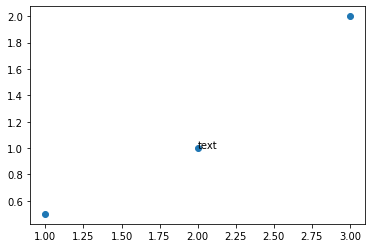

In [16]:
#Utilisation de plt.text
a = [1,2,3]
b=[0.5,1,2]
import matplotlib.pyplot as plt
plt.scatter(a,b)
plt.text(a[1],b[1],"text")

### Formulaire

- Moyenne empirique: $\bar{x} = \frac{1}{n} \sum_{i = 1}^n x_i $
- Variance empirique: $s^2_{x} = \frac{1}{n} \sum_{i = 1}^n (x_i  - \bar{x})^2$
- Covariance: $s_{jk} =  \frac{1}{n}    \sum_{i=1}^n  (x_{i,j}- \bar{x}_j)(x_{i,k}- \bar{x}_k)$
- Corrélation: $r_{j,k} = \frac{s_{jk}}{s_j s_k} $
- Variance totale: $s^2 = \sum_{i=1}^{n} (y_i - \bar{y})^2 = \sum_{j \in \Omega_x} \sum_{i=1}^{n_j} (y_{ij} -  \bar{y})^2 =
        s^2_{\textrm{inter}} + s^2_{\textrm{intra}}$
- Variance intra-classe: $s^2_{\textrm{intra}} = \sum_{j \in \Omega_x}\sum_{i=1}^{n_j} (y_{ij} - \bar{y_j})^2$
- Variance inter-classe: $s^2_{\textrm{inter}} =  \sum_{j \in \Omega_x}\sum_{i=1}^{n_j} (\bar{y_j} - \bar{y})^2 = \sum_{j \in\Omega_x} n_j (\bar{y_j} - \bar{y})^2$
- Rapport des variances: $\eta_{Y/X}^2 = \frac{s^2_{\textrm{inter}}}{s^2} = \frac{\sum_{j \in
          \Omega_x} n_j (\bar{y_j} - \bar{y})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
- Coefficient de corrélation:  $r = \frac{s_{xy}}{s_x s_y} = \frac{\frac{1}{n} \displaystyle \sum_{i=1}^{n} (x_i-\bar{x})(y_i - \bar{y})}{s_x s_y}  = 
\frac{( \sum_{i=1}^n x_i y_i) - n \bar{x} \bar{y}}{\sqrt{ \sum_{i=1}^n (x_i - \bar{x})^2}\sqrt{ \sum_{i=1}^n (y_i - \bar{y})^2}}$
